# **1. Analytical Calculation of Fourier Series Coefficients** #

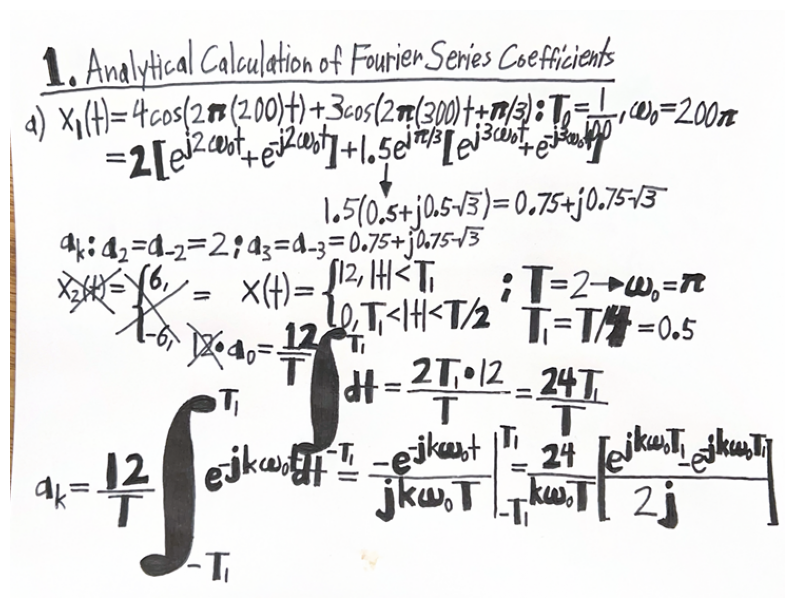

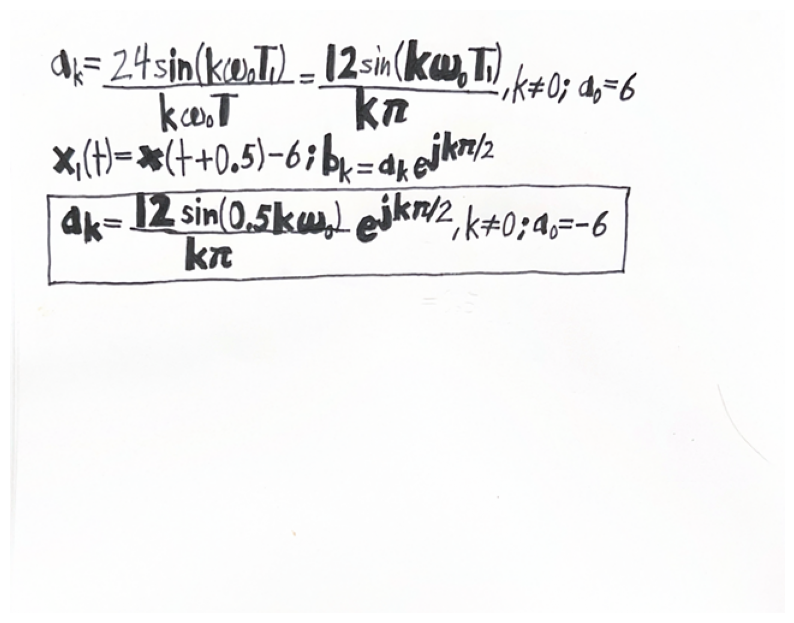

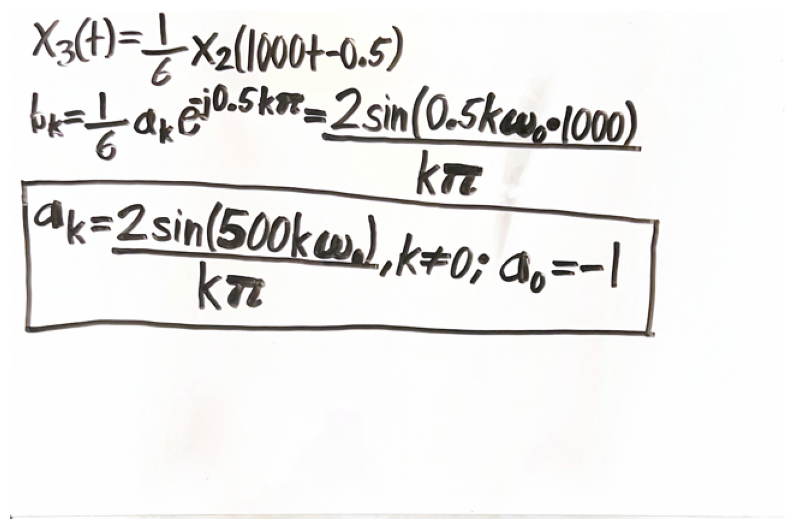

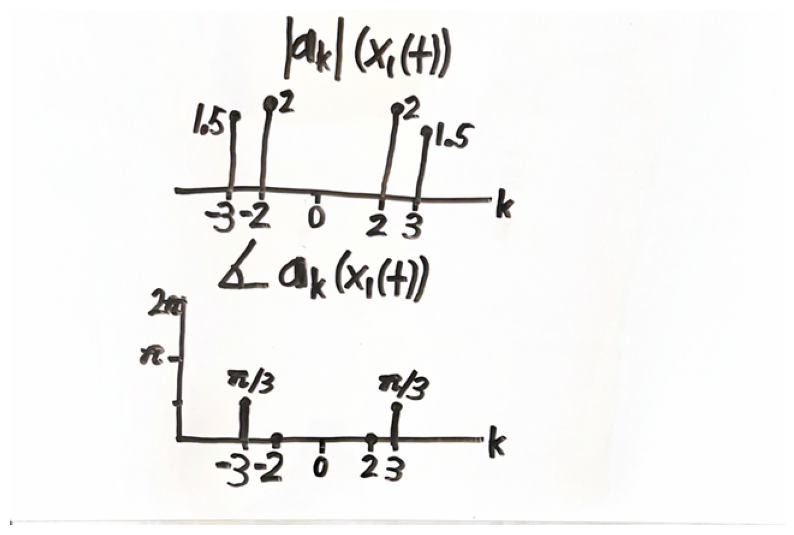

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'Screenshot 2024-10-08 191052.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()
image_path = 'Screenshot 2024-10-08 191113.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()
image_path = 'Screenshot 2024-10-08 191133.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()
image_path = 'Screenshot 2024-10-08 191200.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 26))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

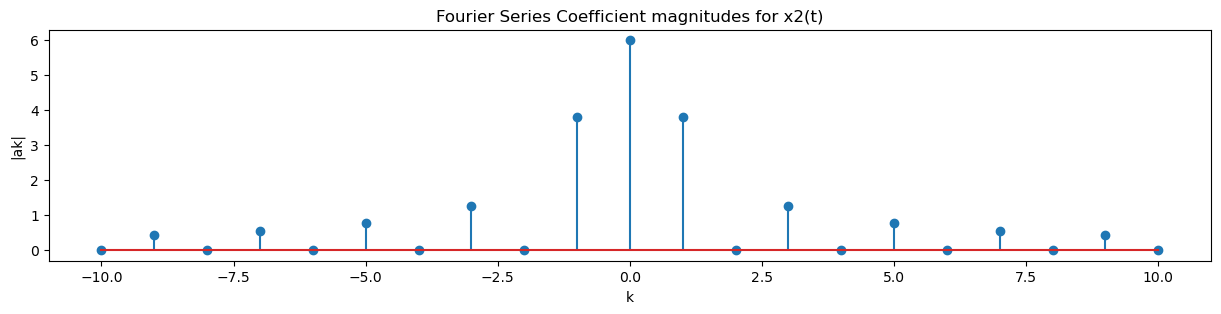

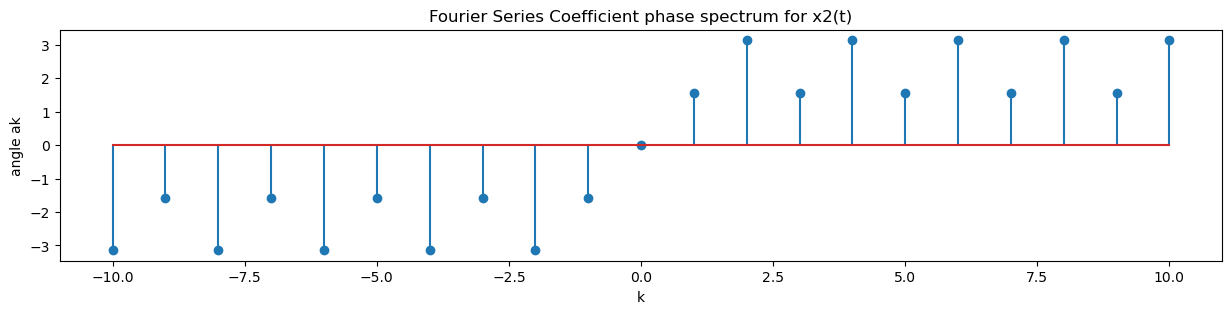

In [4]:
import numpy as np

omega0 = np.pi
k = np.arange(-10,11,1)
ak = np.zeros(len(k))
for n in range(len(k)):
    if k[n] != 0:
        ak[n] = np.abs(12*np.sin(0.5*k[n]*omega0)*np.exp(1j*k[n]*omega0*0.5)/(k[n]*omega0))
    elif k[n] == 0:
        ak[n] = 6
plt.figure(figsize=(15, 3))
plt.stem(k, ak)
plt.title('Fourier Series Coefficient magnitudes for x2(t)')
plt.xlabel('k')
plt.ylabel('|ak|')
plt.show()
for n in range(len(k)):
    if k[n] != 0:
        ak[n] = np.angle(12*np.sin(0.5*k[n]*omega0)*np.exp(1j*k[n]*omega0*0.5)/(k[n]*omega0))
    elif k[n] == 0:
        ak[n] = 0
plt.figure(figsize=(15, 3))
plt.stem(k, ak)
plt.title('Fourier Series Coefficient phase spectrum for x2(t)')
plt.xlabel('k')
plt.ylabel('angle ak')
plt.show()


**This signal is anti-symmetric.**
**The magnitudes form a symmetric sinc pulse, and the phases form an antisymmetric sawtooth wave.**

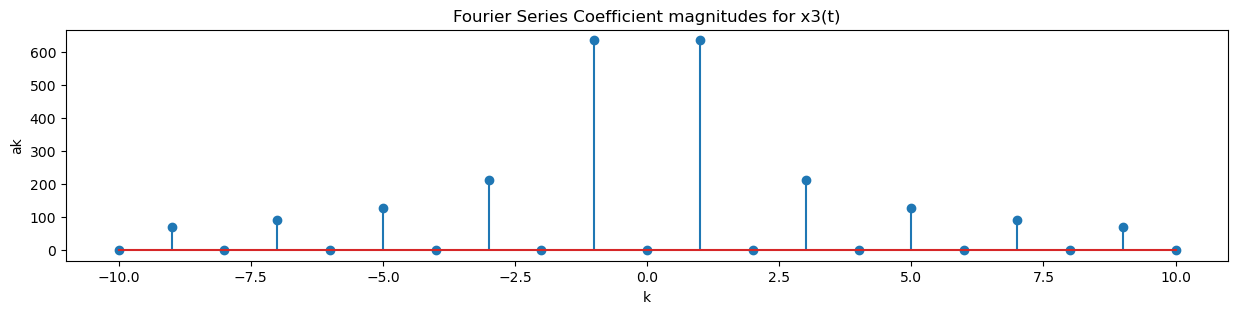

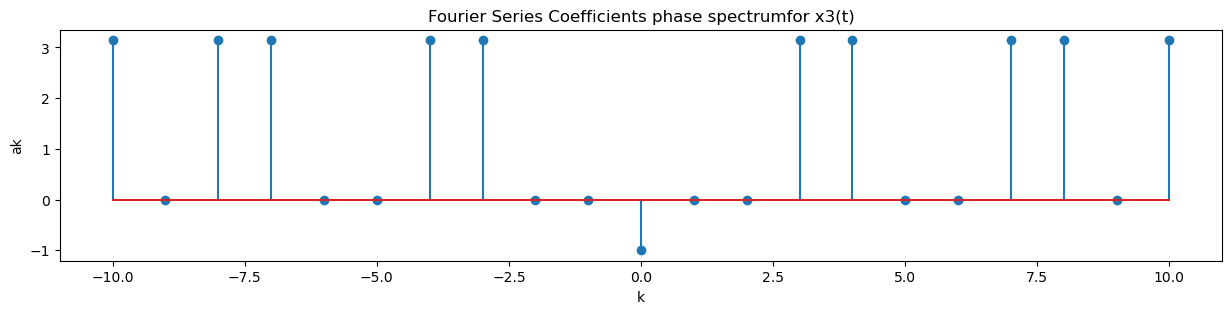

In [7]:
omega0 = np.pi/1000
k = np.arange(-10,11,1)
ak = np.zeros(len(k))
for n in range(len(k)):
    if k[n] != 0:
        ak[n] = np.abs(2*np.sin(500*k[n]*omega0)/(k[n]*omega0))
    elif k[n] == 0:
        ak[n] = -1
plt.figure(figsize=(15, 3))
plt.stem(k, ak)
plt.title('Fourier Series Coefficient magnitudes for x3(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()
for n in range(len(k)):
    if k[n] != 0:
        ak[n] = np.angle(2*np.sin(500*k[n]*omega0)/(k[n]*omega0))
    elif k[n] == 0:
        ak[n] = -1
plt.figure(figsize=(15, 3))
plt.stem(k, ak)
plt.title('Fourier Series Coefficients phase spectrumfor x3(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

**The signal is symmetric. The magnitudes form a symmetric sinc pulse, and the phases form a symmetric Dirac Delta impulse train**

# **2. Calculation of Fourier Series Coefficients by Python** #

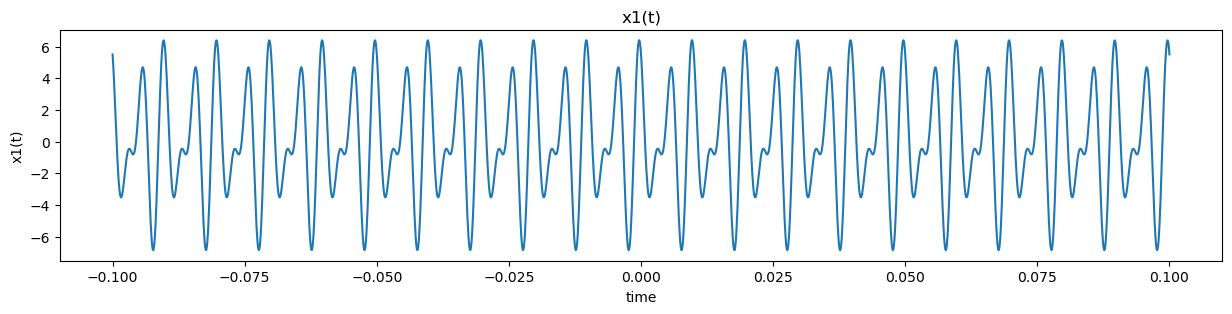

[ 7.91467586e-16  1.58157992e-15  5.82758668e-16  1.24683250e-15
  8.61940727e-16  1.73472348e-16  1.06251813e-15  7.50000000e-01
  2.00000000e+00 -1.73472348e-16  2.16840434e-16  1.73472348e-16
  2.00000000e+00  7.50000000e-01  1.06251813e-15  1.73472348e-16
  8.61940727e-16  1.24683250e-15  5.82758668e-16  1.58157992e-15
  7.91467586e-16]


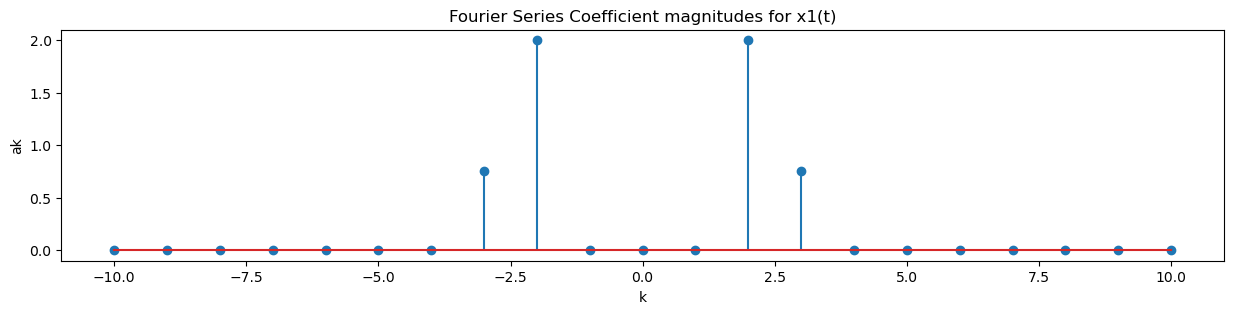

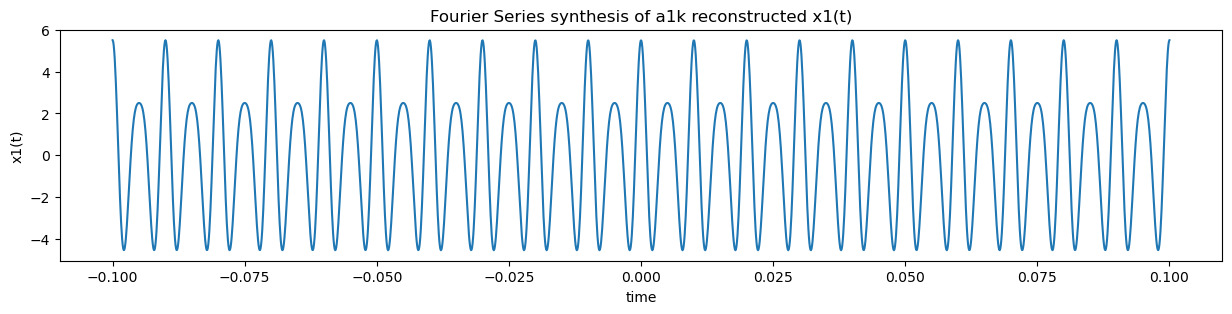

In [121]:
import scipy.integrate as integrate
import scipy.signal as signal

N_ks = 10

T_per1 = 0.01

def x1t_func(t):
    return (4*np.cos(2*np.pi*200*t)+3*np.cos(2*np.pi*300*t+np.pi/3))*np.exp(-1j*Nk*2*np.pi*t/T_per1)
    
def fourier_coeffs(xt, N, T0):
    global Nk
    Nk = -N
    ak = np.zeros(N*2+1)
    for k in range(-N,N+1):
        if k != 0:
            ak[k+N-1] = np.abs(integrate.quad(xt,0,T0)[0]*(1/T0))
        else:
            ak[k+N-1] = integrate.quad(xt,0,T0)[0]*(1/T0)
        Nk = k
    return ak

def ctfssynth(N, T0, FS_coeffs, tt):
    xt=np.zeros(len(tt)).astype(np.complex128)
    for coeff in range(len(FS_coeffs)):
        xt+=FS_coeffs[coeff]*np.exp(1j*(coeff-N)*tt*2*np.pi/T0)
    return np.abs(xt)*(np.cos(np.angle(xt))+np.sin(np.angle(xt)))

    
sampling_rate1 = 10000
xt1_start = -0.1
xt1_end = 0.1
dur1 = xt1_end - xt1_start
tt1 = np.linspace(xt1_start, xt1_end, int(sampling_rate1*dur1))
x1t = 4*np.cos(2*np.pi*200*tt1)+3*np.cos(2*np.pi*300*tt1+np.pi/3)

plt.figure(figsize=(15, 3))
plt.plot(tt1, x1t)
plt.title('x1(t)')
plt.xlabel('time')
plt.ylabel('x1(t)')
plt.show()

kk = np.arange(-N_ks, N_ks+1, 1)
a1k = fourier_coeffs(x1t_func, N_ks, T_per1)
print(a1k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a1k)
plt.title('Fourier Series Coefficient magnitudes for x1(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x1t_synth = ctfssynth(N_ks, T_per1, a1k, tt1)
plt.figure(figsize=(15, 3))
plt.plot(tt1, x1t_synth)
plt.title('Fourier Series synthesis of a1k reconstructed x1(t)')
plt.xlabel('time')
plt.ylabel('x1(t)')
plt.show()


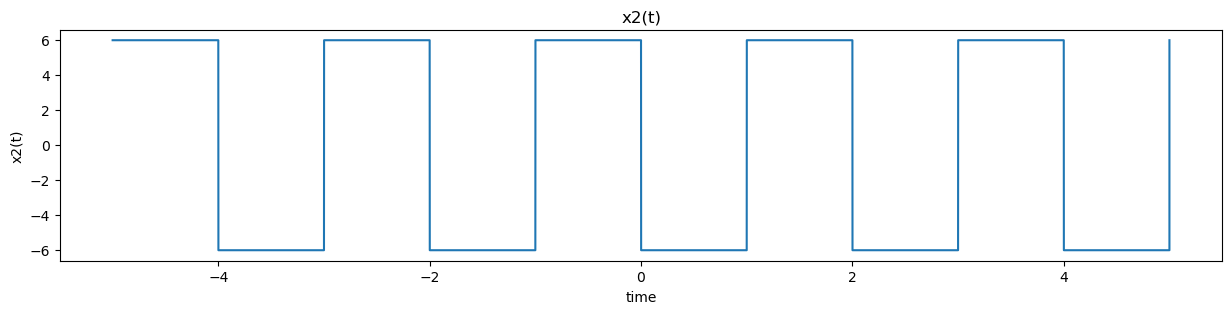

[ 1.23623616e-15  1.24125427e-15  4.37150316e-16  9.14268908e-16
  1.82571291e-16  4.90428237e-16  1.51267887e-15  8.98773193e-16
  4.44089210e-16 -4.69185088e-16  0.00000000e+00  4.69185088e-16
  4.44089210e-16  8.98773193e-16  1.51267887e-15  4.90428237e-16
  1.82571291e-16  9.14268908e-16  4.37150316e-16  1.24125427e-15
  1.23623616e-15]


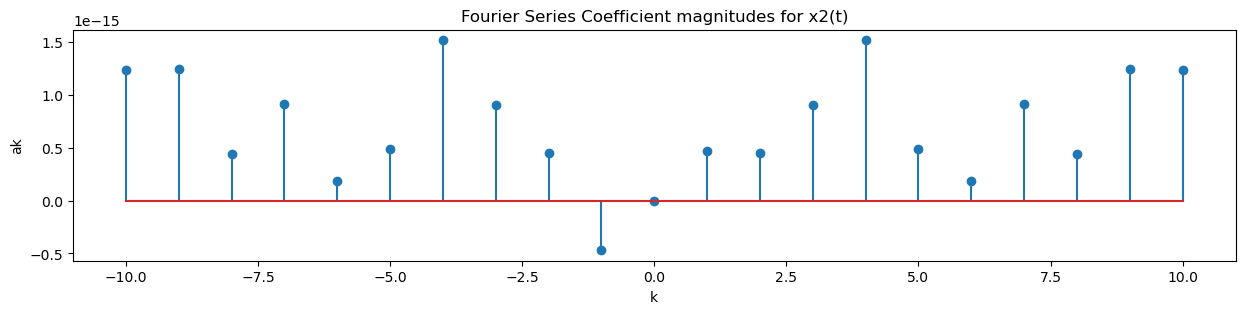

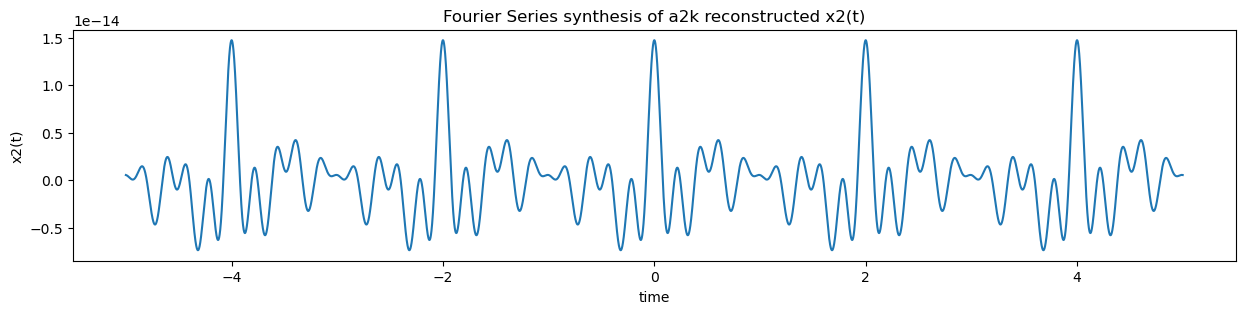

In [60]:
T_per2 = 2
def x2t_func(t):
    #return (12*signal.square(np.pi*t+np.pi)-6)*np.exp(-1j*Nk*2*np.pi*t/T_per2)
    return 6*signal.square(np.pi*t+np.pi)*np.exp(-1j*Nk*2*np.pi*t/T_per2)

sampling_rate2 = 100000
xt2_start = -5
xt2_end = 5
dur2 = xt2_end - xt2_start
tt2 = np.linspace(xt2_start, xt2_end, int(sampling_rate2*dur2))
x2t = 6*signal.square(np.pi*tt2+np.pi)


plt.figure(figsize=(15, 3))
plt.plot(tt2, x2t)
plt.title('x2(t)')
plt.xlabel('time')
plt.ylabel('x2(t)')
plt.show()

a2k = fourier_coeffs(x2t_func, N_ks, T_per2)
print(a2k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a2k)
plt.title('Fourier Series Coefficient magnitudes for x2(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x2t_synth = ctfssynth(N_ks, T_per2, a2k, tt2)
plt.figure(figsize=(15, 3))
plt.plot(tt2, x2t_synth)
plt.title('Fourier Series synthesis of a2k reconstructed x2(t)')
plt.xlabel('time')
plt.ylabel('x2(t)')
plt.show()

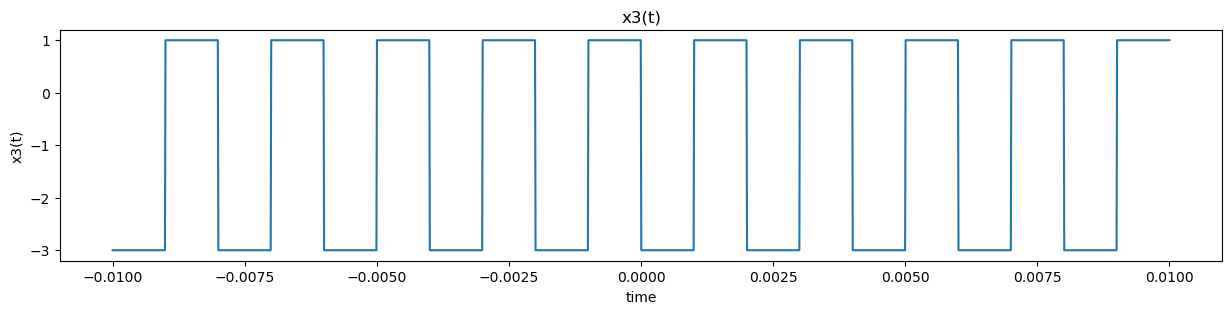

[ 1.23301573e-04  9.98848125e-05  7.89287837e-05  6.04348834e-05
  4.44043438e-05  3.08382332e-05  1.97374555e-05  1.11027502e-05
  4.93469262e-06 -1.23369370e-06  0.00000000e+00  1.23369370e-06
  4.93469262e-06  1.11027502e-05  1.97374555e-05  3.08382332e-05
  4.44043438e-05  6.04348834e-05  7.89287837e-05  9.98848125e-05
  1.23301573e-04]


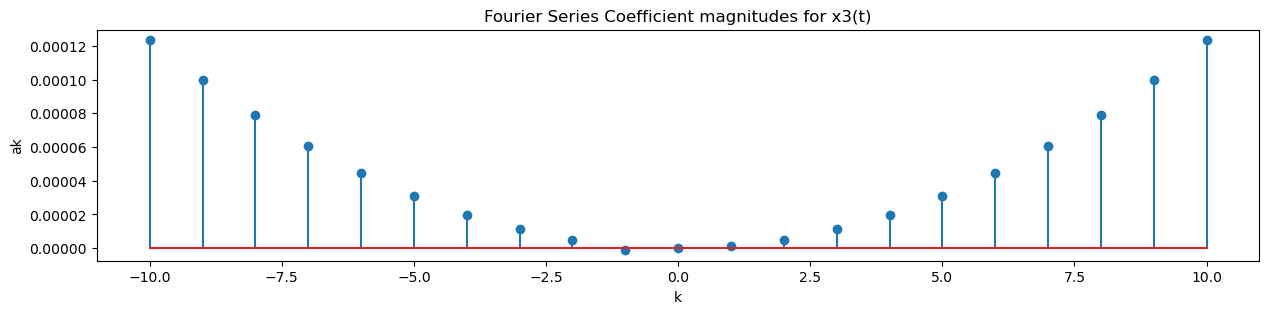

<function matplotlib.pyplot.show(close=None, block=None)>

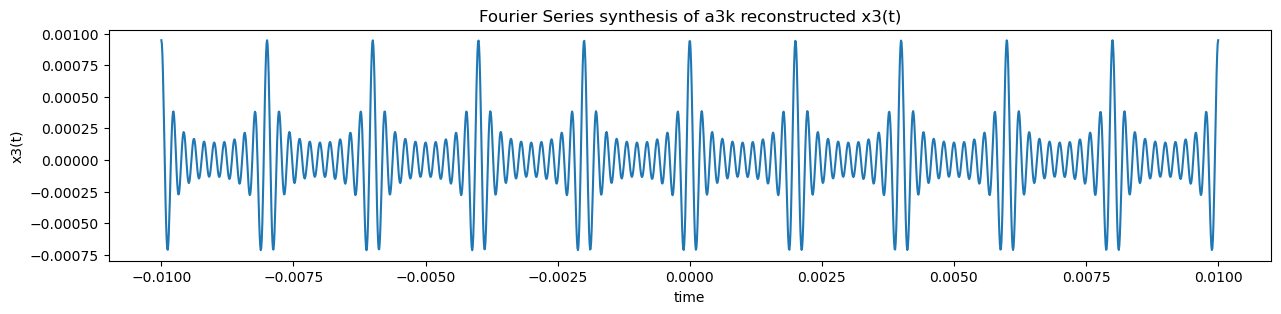

In [62]:
T_per3 = 0.002
def x3t_func(t):
    #return (2*signal.square(np.pi*1000*t+np.pi*0.5)-1)*np.exp(-1j*Nk*2*np.pi*t/T_per2)
    return signal.square(np.pi*1000*t+np.pi*0.5)*np.exp(-1j*Nk*2*np.pi*t/T_per2)

sampling_rate3 = 100000
xt3_start = -0.01
xt3_end = 0.01
dur3 = xt3_end - xt3_start
tt3 = np.linspace(xt3_start, xt3_end, int(sampling_rate3*dur3))
x3t = 2*signal.square(np.pi*1000*tt3+np.pi)-1


plt.figure(figsize=(15, 3))
plt.plot(tt3, x3t)
plt.title('x3(t)')
plt.xlabel('time')
plt.ylabel('x3(t)')
plt.show()

a3k = fourier_coeffs(x3t_func, N_ks, T_per3)
print(a3k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a3k)
plt.title('Fourier Series Coefficient magnitudes for x3(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x3t_synth = ctfssynth(N_ks, T_per3, a3k, tt3)
plt.figure(figsize=(15, 3))
plt.plot(tt3, x3t_synth)
plt.title('Fourier Series synthesis of a3k reconstructed x3(t)')
plt.xlabel('time')
plt.ylabel('x3(t)')
plt.show

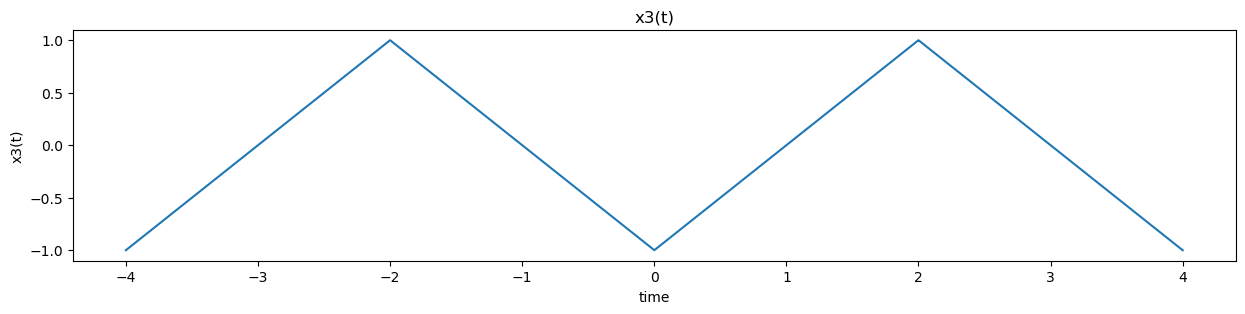

[6.12336664e-17 5.28534800e-18 8.62142927e-18 8.13664638e-17
 1.09867893e-16 1.37078725e-16 3.51624772e-17 2.37510589e-17
 2.69808207e-17 2.29023073e-17 9.68997472e-17 2.29023073e-17
 2.69808207e-17 2.37510589e-17 3.51624772e-17 1.37078725e-16
 1.09867893e-16 8.13664638e-17 8.62142927e-18 5.28534800e-18
 6.12336664e-17]


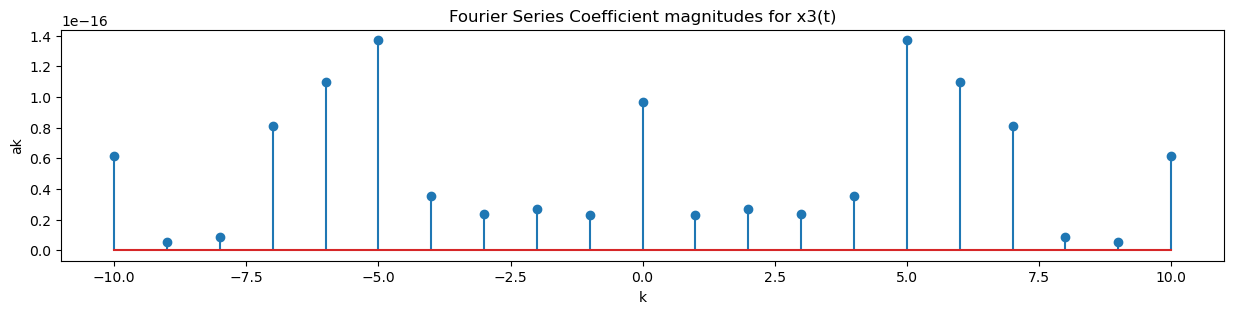

<function matplotlib.pyplot.show(close=None, block=None)>

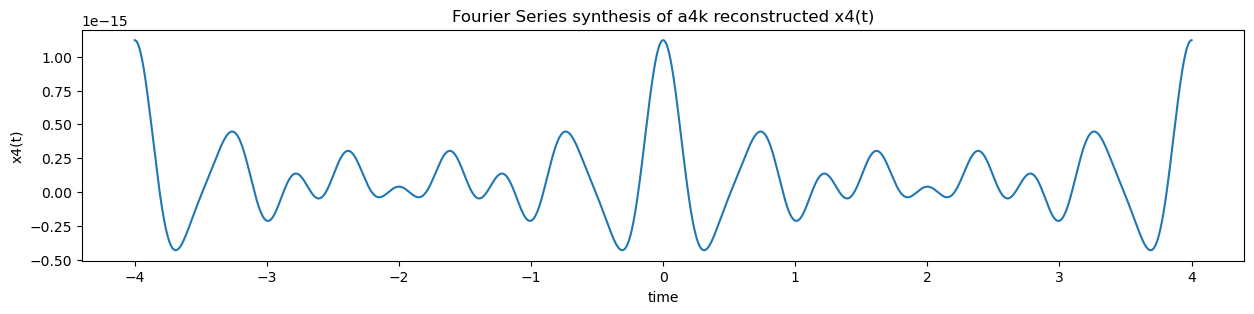

In [64]:
T_per4 = 4
def x4t_func(t):
    #return (2*signal.square(np.pi*1000*t+np.pi*0.5)-1)*np.exp(-1j*Nk*2*np.pi*t/T_per2)
    return signal.sawtooth(np.pi*0.5*t+np.pi*0.5+np.pi,0.5)*np.exp(-1j*Nk*2*np.pi*t/T_per4)

sampling_rate4 = 1000
xt4_start = -4
xt4_end = 4
dur4 = xt4_end - xt4_start
tt4 = np.linspace(xt4_start, xt4_end, int(sampling_rate4*dur4))
x4t = signal.sawtooth(np.pi*0.5*tt4+np.pi+np.pi,0.5)


plt.figure(figsize=(15, 3))
plt.plot(tt4, x4t)
plt.title('x3(t)')
plt.xlabel('time')
plt.ylabel('x3(t)')
plt.show()

a4k = fourier_coeffs(x4t_func, N_ks, T_per4)
print(a4k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a4k)
plt.title('Fourier Series Coefficient magnitudes for x3(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x4t_synth = ctfssynth(N_ks, T_per4, a4k, tt4)
plt.figure(figsize=(15, 3))
plt.plot(tt4, x4t_synth)
plt.title('Fourier Series synthesis of a4k reconstructed x4(t)')
plt.xlabel('time')
plt.ylabel('x4(t)')
plt.show 

# **3. Fourier Series Synthesis** #

[-1.73472348e-16  2.16840434e-16  1.73472348e-16]


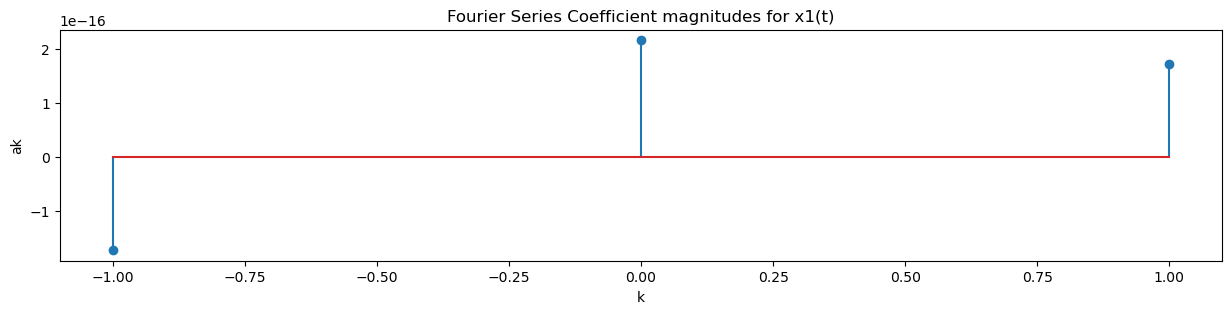

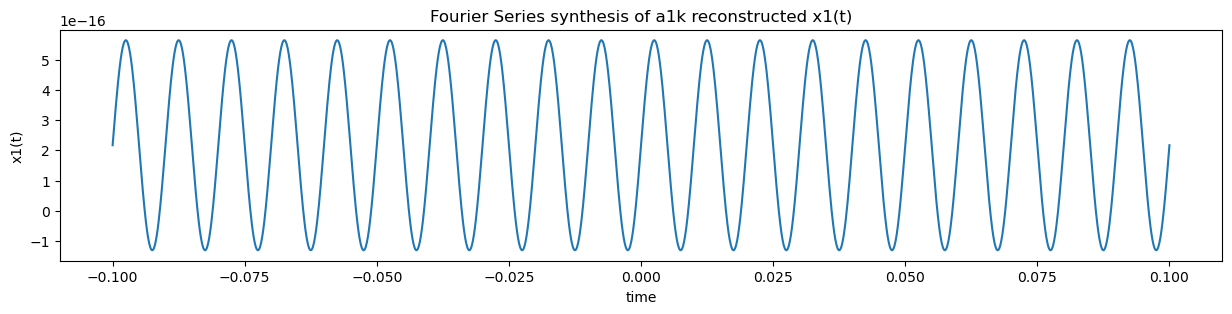

[-4.69185088e-16  0.00000000e+00  4.69185088e-16]


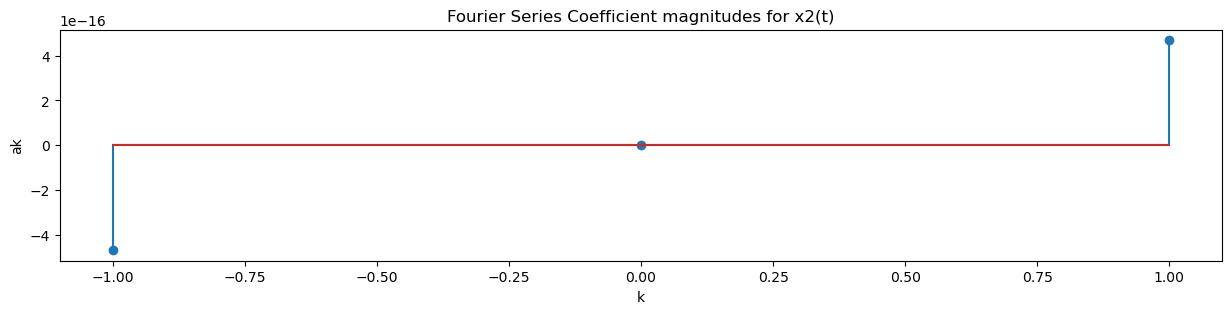

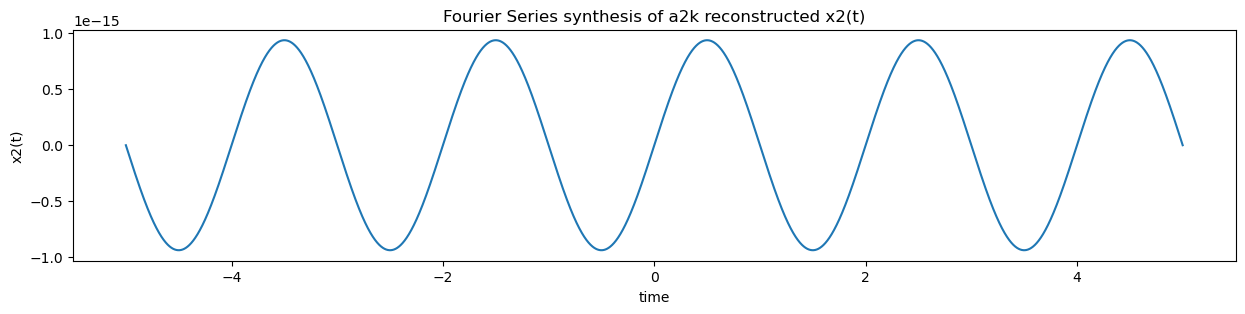

[-1.2336937e-06  0.0000000e+00  1.2336937e-06]


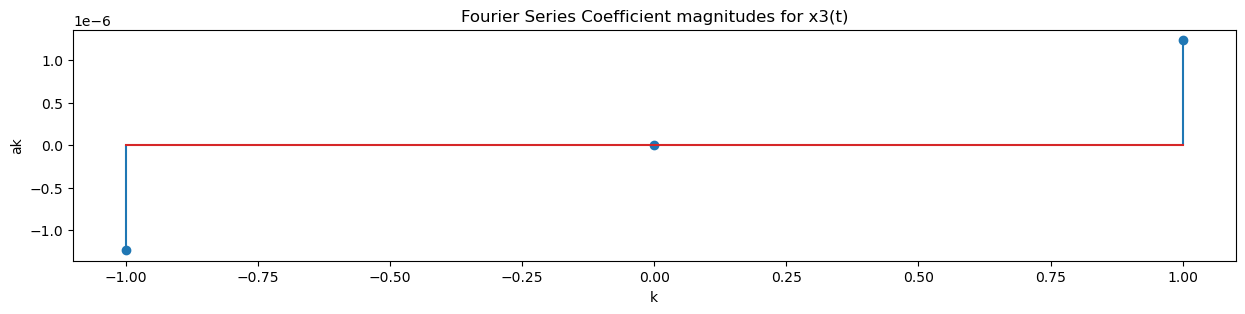

<function matplotlib.pyplot.show(close=None, block=None)>

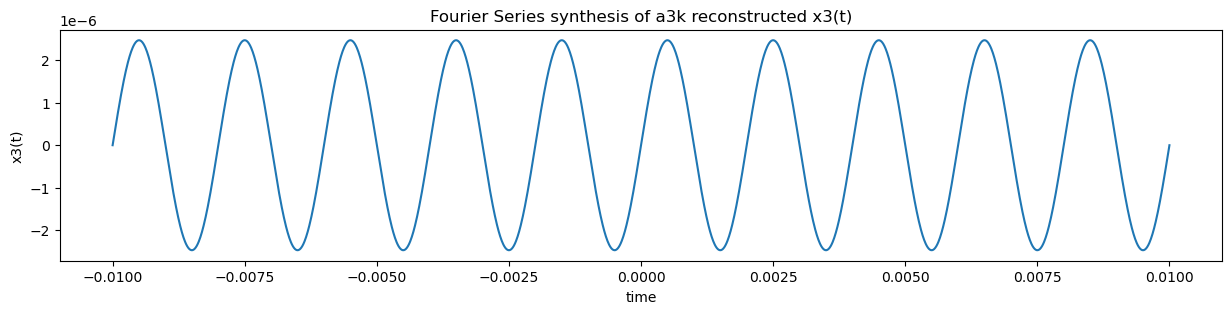

In [24]:
N_ks = 1
kk = np.arange(-N_ks, N_ks+1, 1)
a1k = fourier_coeffs(x1t_func, N_ks, T_per1)
print(a1k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a1k)
plt.title('Fourier Series Coefficient magnitudes for x1(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x1t_synth = ctfssynth(N_ks, T_per1, a1k, tt1)
plt.figure(figsize=(15, 3))
plt.plot(tt1, x1t_synth)
plt.title('Fourier Series synthesis of a1k reconstructed x1(t)')
plt.xlabel('time')
plt.ylabel('x1(t)')
plt.show()

a2k = fourier_coeffs(x2t_func, N_ks, T_per2)
print(a2k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a2k)
plt.title('Fourier Series Coefficient magnitudes for x2(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x2t_synth = ctfssynth(N_ks, T_per2, a2k, tt2)
plt.figure(figsize=(15, 3))
plt.plot(tt2, x2t_synth)
plt.title('Fourier Series synthesis of a2k reconstructed x2(t)')
plt.xlabel('time')
plt.ylabel('x2(t)')
plt.show()

a3k = fourier_coeffs(x3t_func, N_ks, T_per3)
print(a3k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a3k)
plt.title('Fourier Series Coefficient magnitudes for x3(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x3t_synth = ctfssynth(N_ks, T_per3, a3k, tt3)
plt.figure(figsize=(15, 3))
plt.plot(tt3, x3t_synth)
plt.title('Fourier Series synthesis of a3k reconstructed x3(t)')
plt.xlabel('time')
plt.ylabel('x3(t)')
plt.show

[ 1.73472348e-16  1.06251813e-15  7.50000000e-01  2.00000000e+00
 -1.73472348e-16  2.16840434e-16  1.73472348e-16  2.00000000e+00
  7.50000000e-01  1.06251813e-15  1.73472348e-16]


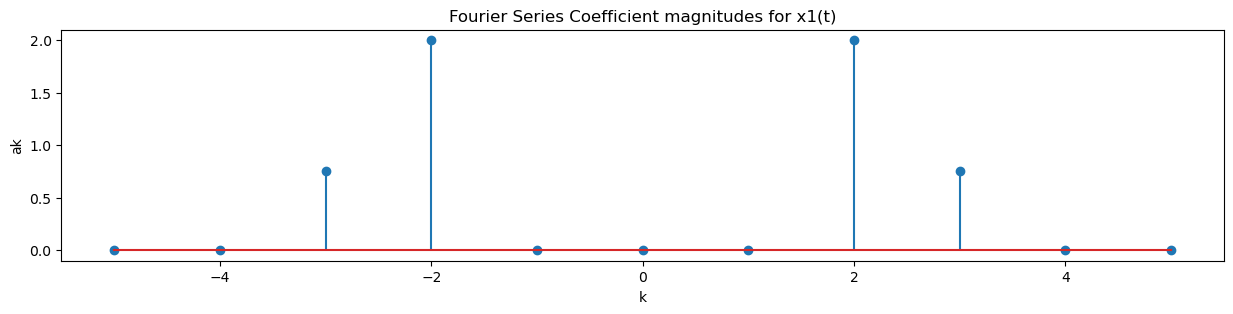

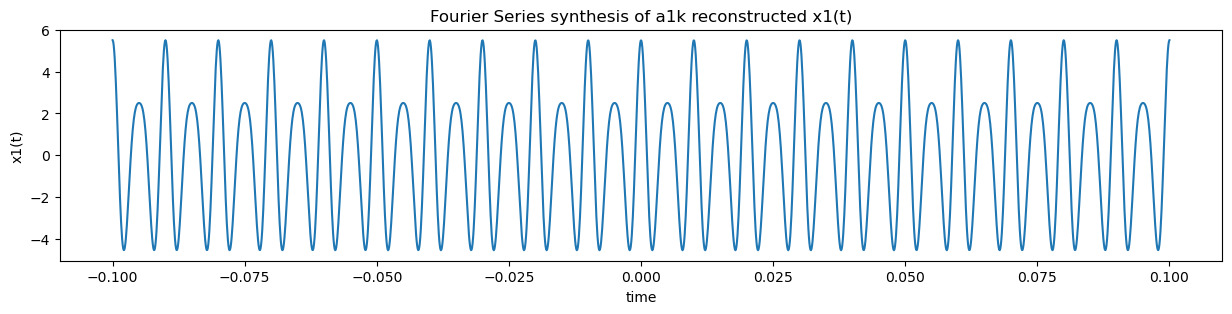

[ 4.90428237e-16  1.51267887e-15  8.98773193e-16  4.44089210e-16
 -4.69185088e-16  0.00000000e+00  4.69185088e-16  4.44089210e-16
  8.98773193e-16  1.51267887e-15  4.90428237e-16]


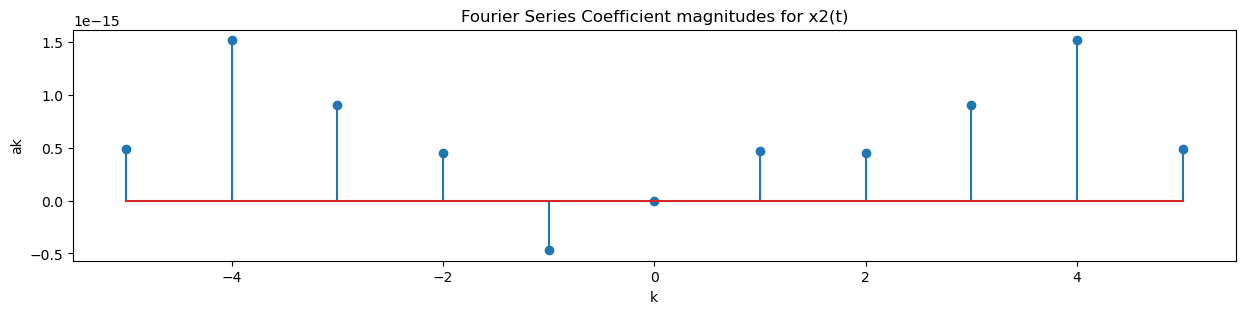

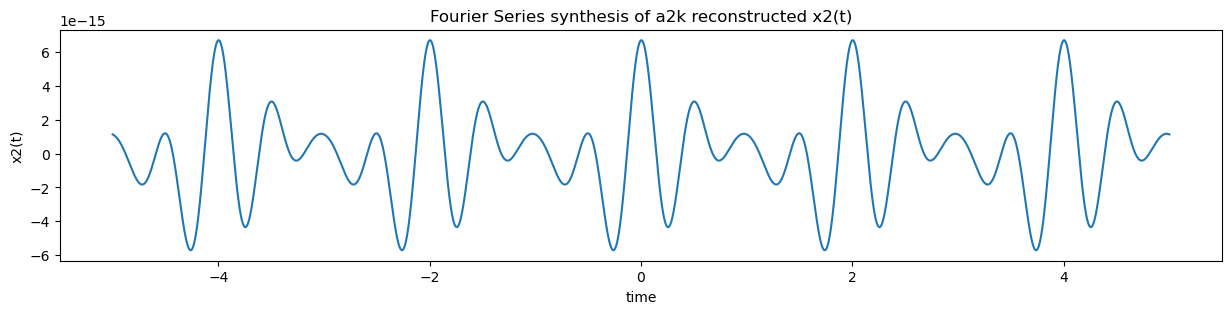

[ 3.08382332e-05  1.97374555e-05  1.11027502e-05  4.93469262e-06
 -1.23369370e-06  0.00000000e+00  1.23369370e-06  4.93469262e-06
  1.11027502e-05  1.97374555e-05  3.08382332e-05]


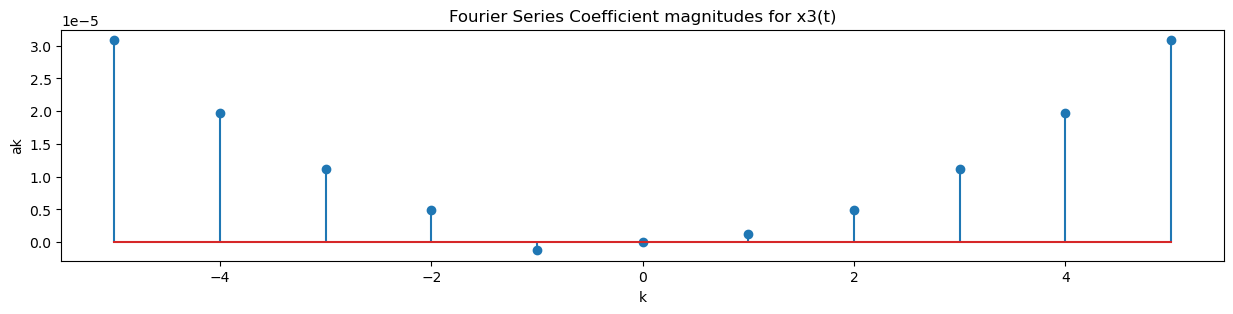

<function matplotlib.pyplot.show(close=None, block=None)>

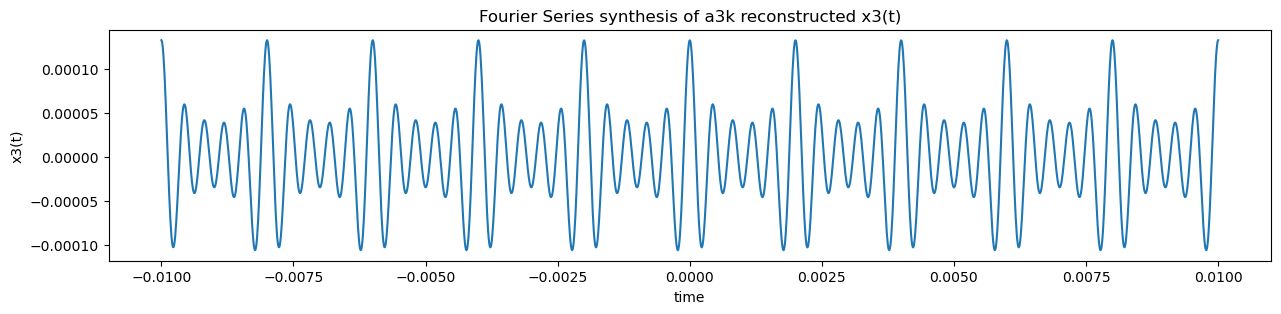

In [26]:
N_ks = 5
kk = np.arange(-N_ks, N_ks+1, 1)
a1k = fourier_coeffs(x1t_func, N_ks, T_per1)
print(a1k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a1k)
plt.title('Fourier Series Coefficient magnitudes for x1(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x1t_synth = ctfssynth(N_ks, T_per1, a1k, tt1)
plt.figure(figsize=(15, 3))
plt.plot(tt1, x1t_synth)
plt.title('Fourier Series synthesis of a1k reconstructed x1(t)')
plt.xlabel('time')
plt.ylabel('x1(t)')
plt.show()

a2k = fourier_coeffs(x2t_func, N_ks, T_per2)
print(a2k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a2k)
plt.title('Fourier Series Coefficient magnitudes for x2(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x2t_synth = ctfssynth(N_ks, T_per2, a2k, tt2)
plt.figure(figsize=(15, 3))
plt.plot(tt2, x2t_synth)
plt.title('Fourier Series synthesis of a2k reconstructed x2(t)')
plt.xlabel('time')
plt.ylabel('x2(t)')
plt.show()

a3k = fourier_coeffs(x3t_func, N_ks, T_per3)
print(a3k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a3k)
plt.title('Fourier Series Coefficient magnitudes for x3(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x3t_synth = ctfssynth(N_ks, T_per3, a3k, tt3)
plt.figure(figsize=(15, 3))
plt.plot(tt3, x3t_synth)
plt.title('Fourier Series synthesis of a3k reconstructed x3(t)')
plt.xlabel('time')
plt.ylabel('x3(t)')
plt.show

[ 1.54735979e-15  1.42301535e-15  2.01932655e-16  1.56125113e-15
  2.41234983e-16  5.62429877e-16  7.04731412e-16  1.15467531e-15
  2.34458720e-16  6.34258271e-16  7.91467586e-16  1.58157992e-15
  5.82758668e-16  1.24683250e-15  8.61940727e-16  1.73472348e-16
  1.06251813e-15  7.50000000e-01  2.00000000e+00 -1.73472348e-16
  2.16840434e-16  1.73472348e-16  2.00000000e+00  7.50000000e-01
  1.06251813e-15  1.73472348e-16  8.61940727e-16  1.24683250e-15
  5.82758668e-16  1.58157992e-15  7.91467586e-16  6.34258271e-16
  2.34458720e-16  1.15467531e-15  7.04731412e-16  5.62429877e-16
  2.41234983e-16  1.56125113e-15  2.01932655e-16  1.42301535e-15
  1.54735979e-15]


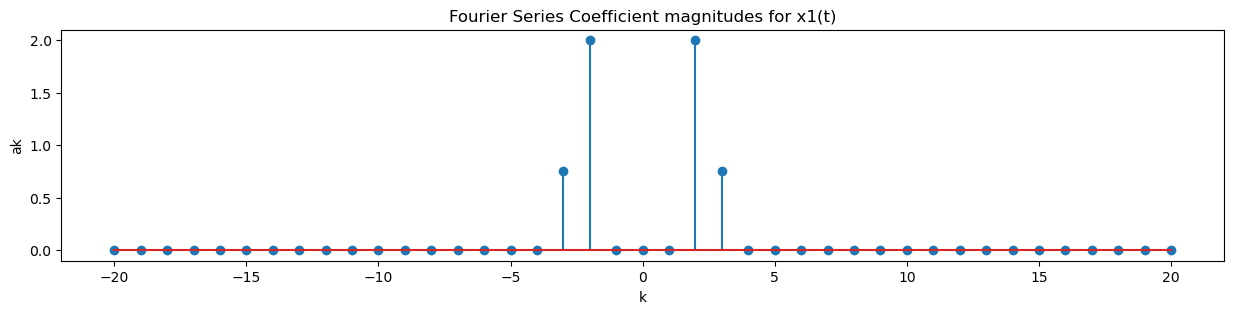

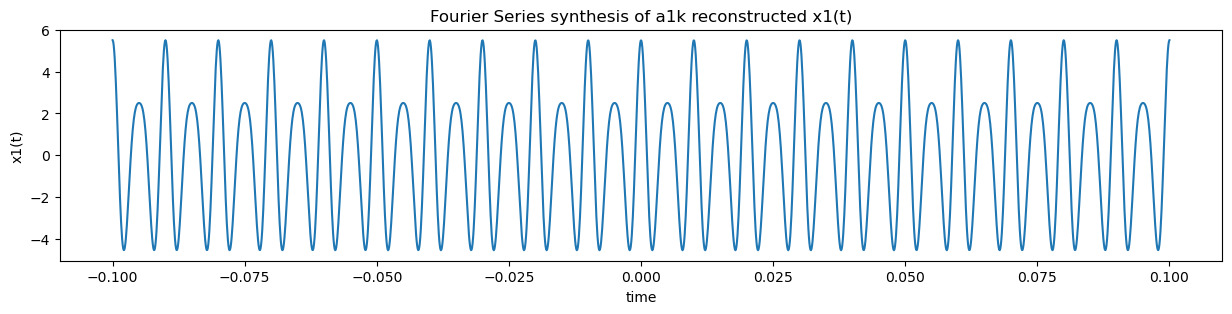

[ 2.78909495e-15  1.98043006e-15  2.17477741e-15  1.16397722e-15
  2.21697660e-15  1.77724829e-15  2.78904958e-16  8.08352856e-16
  4.04892517e-16  2.80807371e-15  1.23623616e-15  1.24125427e-15
  4.37150316e-16  9.14268908e-16  1.82571291e-16  4.90428237e-16
  1.51267887e-15  8.98773193e-16  4.44089210e-16 -4.69185088e-16
  0.00000000e+00  4.69185088e-16  4.44089210e-16  8.98773193e-16
  1.51267887e-15  4.90428237e-16  1.82571291e-16  9.14268908e-16
  4.37150316e-16  1.24125427e-15  1.23623616e-15  2.80807371e-15
  4.04892517e-16  8.08352856e-16  2.78904958e-16  1.77724829e-15
  2.21697660e-15  1.16397722e-15  2.17477741e-15  1.98043006e-15
  2.78909495e-15]


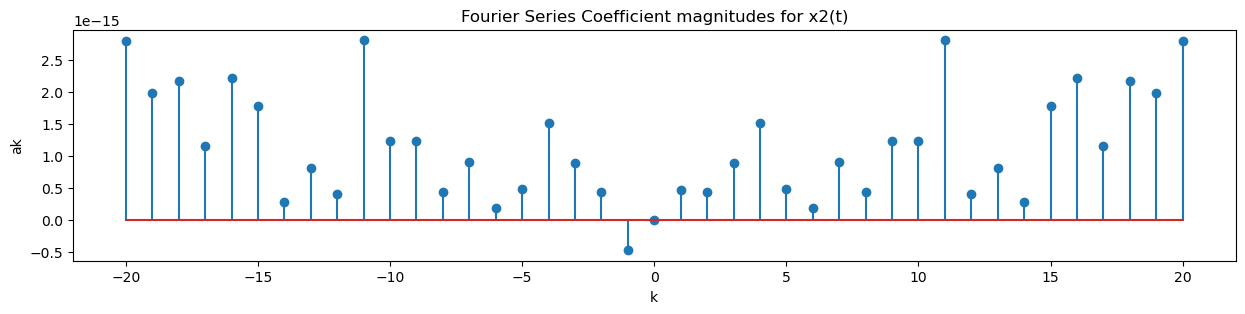

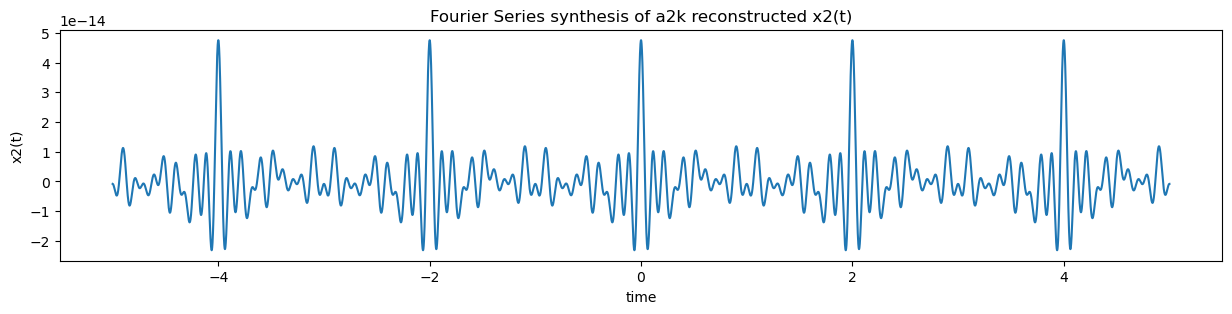

[ 4.92384940e-04  4.44473741e-04  3.99000294e-04  3.55967633e-04
  3.15378630e-04  2.77235991e-04  2.41542261e-04  2.08299820e-04
  1.77510883e-04  1.49177505e-04  1.23301573e-04  9.98848125e-05
  7.89287837e-05  6.04348834e-05  4.44043438e-05  3.08382332e-05
  1.97374555e-05  1.11027502e-05  4.93469262e-06 -1.23369370e-06
  0.00000000e+00  1.23369370e-06  4.93469262e-06  1.11027502e-05
  1.97374555e-05  3.08382332e-05  4.44043438e-05  6.04348834e-05
  7.89287837e-05  9.98848125e-05  1.23301573e-04  1.49177505e-04
  1.77510883e-04  2.08299820e-04  2.41542261e-04  2.77235991e-04
  3.15378630e-04  3.55967633e-04  3.99000294e-04  4.44473741e-04
  4.92384940e-04]


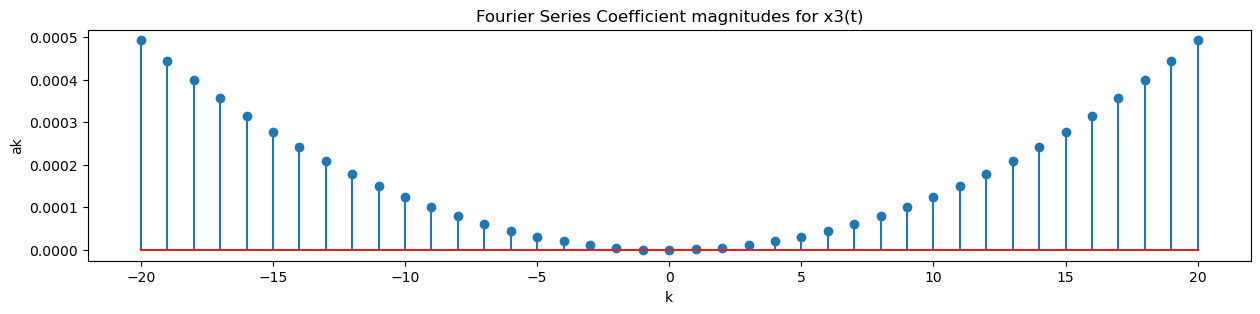

<function matplotlib.pyplot.show(close=None, block=None)>

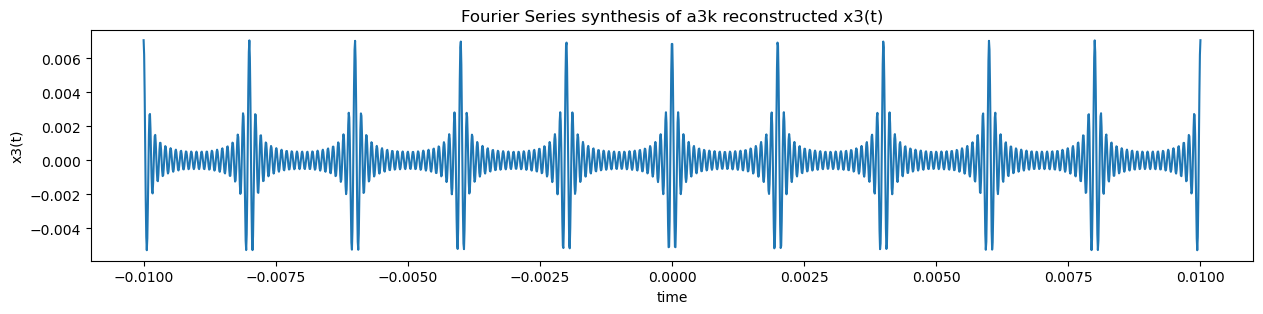

In [28]:
N_ks = 20
kk = np.arange(-N_ks, N_ks+1, 1)
a1k = fourier_coeffs(x1t_func, N_ks, T_per1)
print(a1k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a1k)
plt.title('Fourier Series Coefficient magnitudes for x1(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x1t_synth = ctfssynth(N_ks, T_per1, a1k, tt1)
plt.figure(figsize=(15, 3))
plt.plot(tt1, x1t_synth)
plt.title('Fourier Series synthesis of a1k reconstructed x1(t)')
plt.xlabel('time')
plt.ylabel('x1(t)')
plt.show()

a2k = fourier_coeffs(x2t_func, N_ks, T_per2)
print(a2k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a2k)
plt.title('Fourier Series Coefficient magnitudes for x2(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x2t_synth = ctfssynth(N_ks, T_per2, a2k, tt2)
plt.figure(figsize=(15, 3))
plt.plot(tt2, x2t_synth)
plt.title('Fourier Series synthesis of a2k reconstructed x2(t)')
plt.xlabel('time')
plt.ylabel('x2(t)')
plt.show()

a3k = fourier_coeffs(x3t_func, N_ks, T_per3)
print(a3k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a3k)
plt.title('Fourier Series Coefficient magnitudes for x3(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x3t_synth = ctfssynth(N_ks, T_per3, a3k, tt3)
plt.figure(figsize=(15, 3))
plt.plot(tt3, x3t_synth)
plt.title('Fourier Series synthesis of a3k reconstructed x3(t)')
plt.xlabel('time')
plt.ylabel('x3(t)')
plt.show

/tmp/ipykernel_133/3049251137.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ak[k+N-1] = np.abs(integrate.quad(xt,0,T0)[0]*(1/T0))
/tmp/ipykernel_133/3049251137.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  ak[k+N-1] = np.abs(integrate.quad(xt,0,T0)[0]*(1/T0))


[ 6.73560600e-16  3.95462742e-15  4.99410626e-16  2.02203705e-15
  3.75125481e-15  2.28834421e-15  2.69017664e-15  2.10659300e-02
  1.08149167e-15  3.96690940e-15  6.17063502e-16  2.51399379e-15
  1.13028076e-15  1.04083409e-15  3.00052951e-15  3.65240607e-15
  3.95462742e-15  4.51434680e-15  4.19179665e-15  1.50433051e-15
  3.64020350e-15  1.27122705e-15  1.59919820e-16  1.41081808e-15
  2.82705716e-15  8.06036553e-16  4.03865309e-15  8.21283146e-16
  2.29037709e-16  9.41900637e-16  1.86618299e-15  1.71303943e-15
  5.78184690e-15  1.91675086e-15  3.40896880e-15  9.54987296e-16
  2.92537651e-15  1.40946282e-15  1.08759030e-16  9.79847713e-16
  4.18908614e-15  4.58414231e-16  1.14518854e-15  4.69967760e-15
  5.67850888e-16  1.50128120e-15  4.74338450e-17  1.81942677e-15
  1.00288701e-15  9.09374572e-16  4.17553362e-15  2.99917426e-15
  1.90764525e-15  4.00917635e-15  2.50721752e-17  1.06285694e-15
  4.23516474e-16  2.33950500e-16  9.13440330e-16  9.94755493e-16
  3.76285916e-15  2.11893

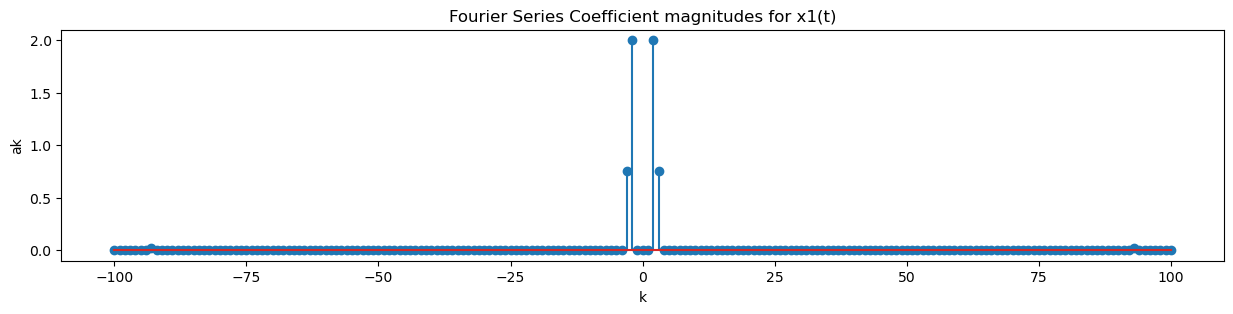

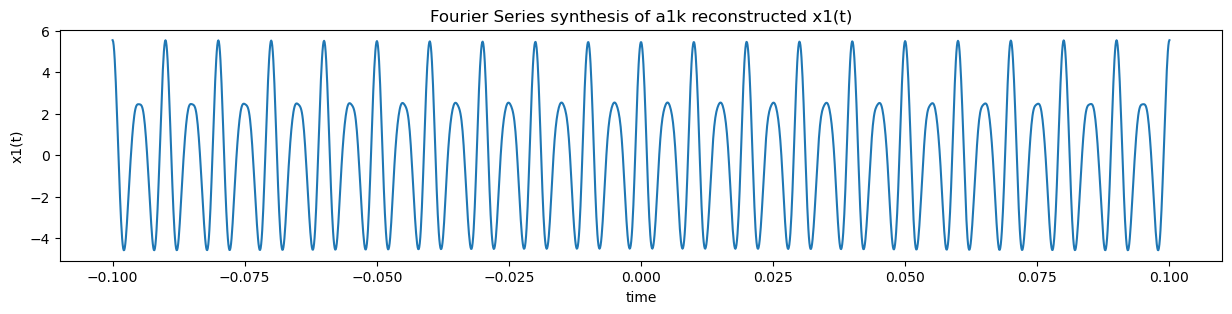

[ 7.00481156e-15  1.52402273e-14  1.20160766e-15  1.54597824e-14
  1.72354332e-14  1.27287924e-14  4.72074186e-15  7.82331497e-14
  6.98323581e-15  1.29761949e-14  8.48842019e-15  1.90845865e-14
  3.33037289e-16  4.27554599e-15  5.45776217e-15  9.27194668e-15
  5.15682337e-15  4.15723558e-14  8.26321667e-15  2.79576476e-14
  5.12855880e-16  7.88287931e-15  7.46640759e-15  1.92351371e-14
  4.00915901e-15  9.41832436e-15  5.27017429e-15  1.71068633e-14
  1.14803177e-15  3.83274632e-16  1.09144342e-15  2.51664483e-15
  1.72419274e-15  2.24547307e-15  7.71402873e-15  3.94009187e-14
  1.08394196e-14  2.46124091e-15  1.35595341e-15  3.71763099e-15
  1.78425899e-15  7.20489134e-15  4.95213502e-15  3.73193500e-14
  7.48186710e-16  1.65696440e-14  5.08216307e-16  2.94438124e-15
  1.99402646e-15  1.57332327e-14  1.62618472e-15  1.65473945e-14
  1.45084531e-15  4.60945271e-15  3.64633039e-16  2.59769928e-15
  7.36283171e-16  1.43282429e-15  8.51853068e-16  2.30080526e-14
  1.95652088e-15  1.69835

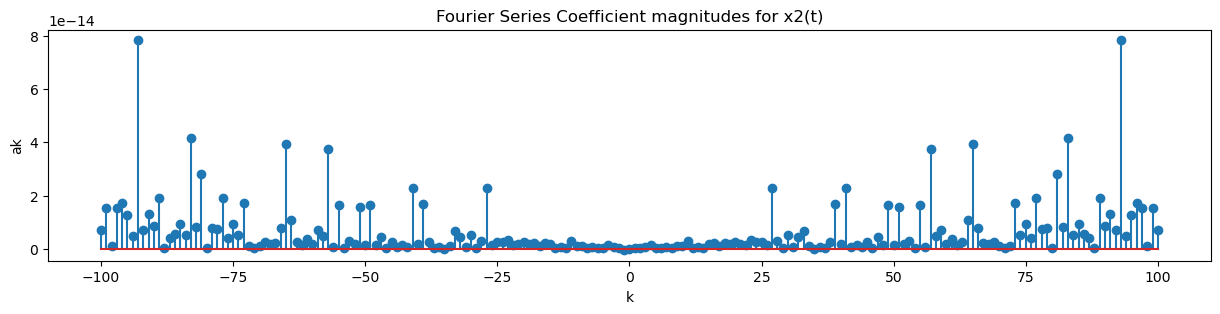

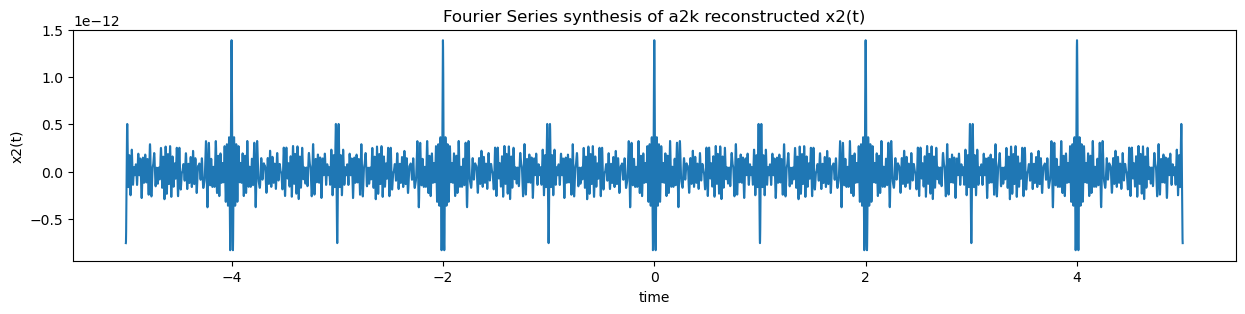

[ 1.16609916e-02  1.14419539e-02  1.12246035e-02  1.10089557e-02
  1.07950254e-02  1.05828277e-02  1.03723772e-02  1.01636886e-02
  9.95677646e-03  9.75165510e-03  9.54833875e-03  9.34684151e-03
  9.14717733e-03  8.94936002e-03  8.75340326e-03  8.55932058e-03
  8.36712538e-03  8.17683089e-03  7.98845023e-03  7.80199637e-03
  7.61748212e-03  7.43492017e-03  7.25432305e-03  7.07570314e-03
  6.89907271e-03  6.72444383e-03  6.55182847e-03  6.38123843e-03
  6.21268537e-03  6.04618081e-03  5.88173610e-03  5.71936247e-03
  5.55907097e-03  5.40087253e-03  5.24477792e-03  5.09079775e-03
  4.93894248e-03  4.78922245e-03  4.64164780e-03  4.49622856e-03
  4.35297458e-03  4.21189558e-03  4.07300111e-03  3.93630056e-03
  3.80180320e-03  3.66951811e-03  3.53945424e-03  3.41162036e-03
  3.28602512e-03  3.16267698e-03  3.04158427e-03  2.92275515e-03
  2.80619763e-03  2.69191955e-03  2.57992861e-03  2.47023235e-03
  2.36283814e-03  2.25775320e-03  2.15498460e-03  2.05453924e-03
  1.95642387e-03  1.86064

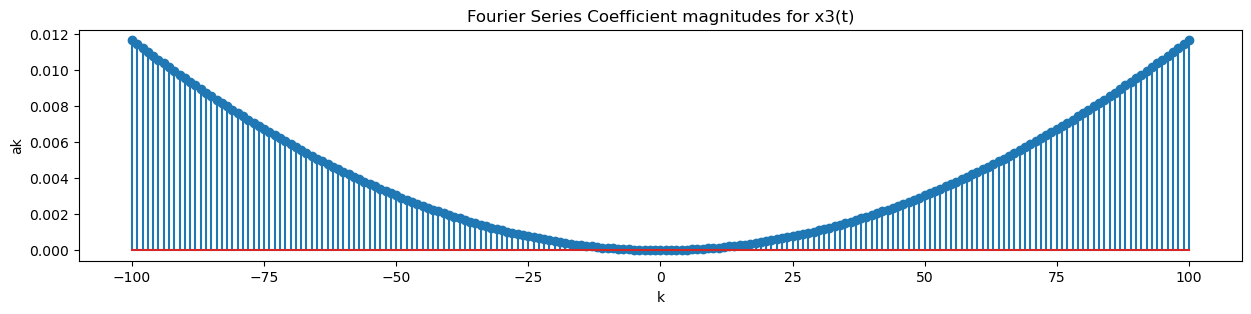

<function matplotlib.pyplot.show(close=None, block=None)>

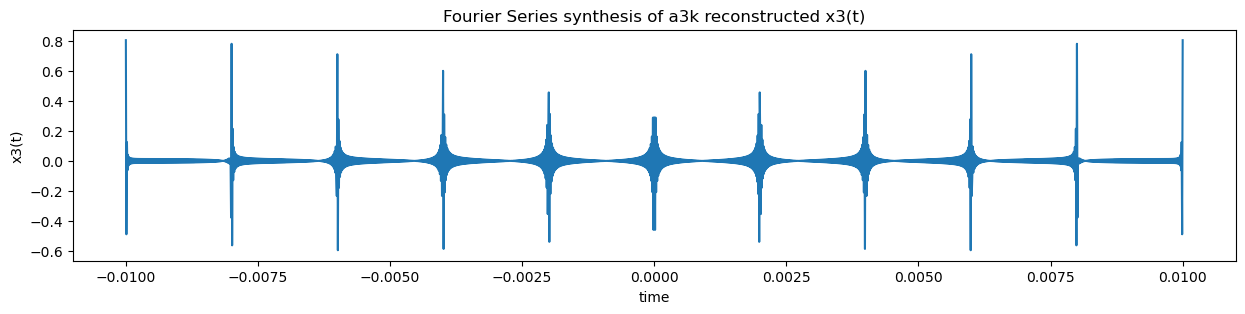

In [30]:
N_ks = 100
kk = np.arange(-N_ks, N_ks+1, 1)
a1k = fourier_coeffs(x1t_func, N_ks, T_per1)
print(a1k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a1k)
plt.title('Fourier Series Coefficient magnitudes for x1(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x1t_synth = ctfssynth(N_ks, T_per1, a1k, tt1)
plt.figure(figsize=(15, 3))
plt.plot(tt1, x1t_synth)
plt.title('Fourier Series synthesis of a1k reconstructed x1(t)')
plt.xlabel('time')
plt.ylabel('x1(t)')
plt.show()

a2k = fourier_coeffs(x2t_func, N_ks, T_per2)
print(a2k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a2k)
plt.title('Fourier Series Coefficient magnitudes for x2(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x2t_synth = ctfssynth(N_ks, T_per2, a2k, tt2)
plt.figure(figsize=(15, 3))
plt.plot(tt2, x2t_synth)
plt.title('Fourier Series synthesis of a2k reconstructed x2(t)')
plt.xlabel('time')
plt.ylabel('x2(t)')
plt.show()

a3k = fourier_coeffs(x3t_func, N_ks, T_per3)
print(a3k)

plt.figure(figsize=(15, 3))
plt.stem(kk, a3k)
plt.title('Fourier Series Coefficient magnitudes for x3(t)')
plt.xlabel('k')
plt.ylabel('ak')
plt.show()

x3t_synth = ctfssynth(N_ks, T_per3, a3k, tt3)
plt.figure(figsize=(15, 3))
plt.plot(tt3, x3t_synth)
plt.title('Fourier Series synthesis of a3k reconstructed x3(t)')
plt.xlabel('time')
plt.ylabel('x3(t)')
plt.show

# **4. Processing Periodic Signals with Continuous-Time LTI Systems** #

In [186]:
def lpfilter(t):
    return np.piecewise(t,[np.logical_and(t>-cutoff_freq,t<=cutoff_freq), np.logical_or(t<=-cutoff_freq,t>cutoff_freq)],[1,0])

def yt(xt, filter, tt, cutoff, N, T0):
    global cutoff_freq
    cutoff_freq = cutoff
    ak_coeffs = fourier_coeffs(xt, N, T0)
    output_spectrum = np.zeros(len(ak_coeffs))
    for k in range(len(ak_coeffs)):
        output_spectrum[k] = ak_coeffs[k]*filter(2*np.pi*k/T0)
    return ctfssynth(N, T0, output_spectrum, tt)

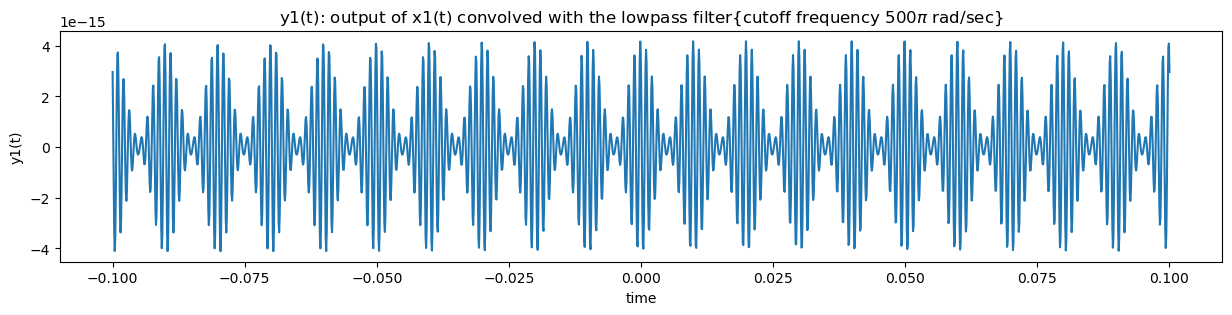

In [188]:
N_ks = 10
y1t = yt(x1t_func, lpfilter, tt1, 500*np.pi, N_ks, T_per1)
plt.figure(figsize=(15, 3))
plt.plot(tt1, y1t)
plt.title('y1(t): output of x1(t) convolved with the lowpass filter{cutoff frequency 500$\pi$ rad/sec}')
plt.xlabel('time')
plt.ylabel('y1(t)')
plt.show()

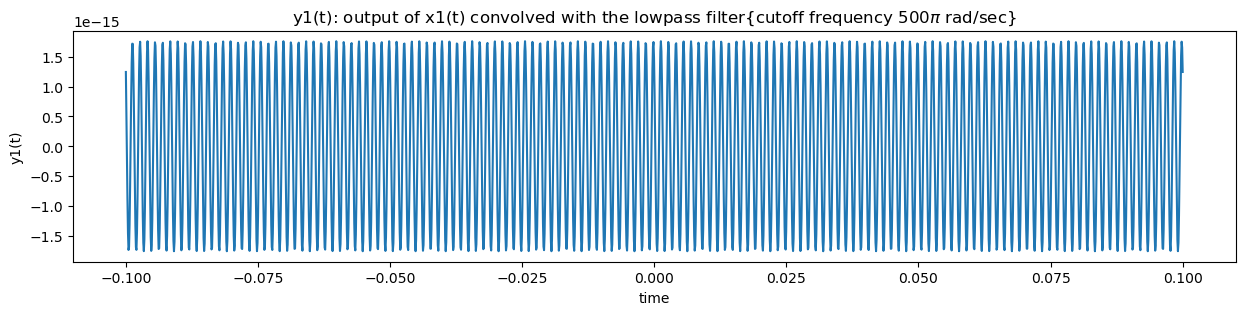

In [194]:
pass_freq = np.pi*625
def bpfilter(t):
    return lpfilter(t-(pass_freq))+lpfilter(t+(pass_freq))
y1t = yt(x1t_func, bpfilter, tt1, 125*np.pi, N_ks, T_per1)
plt.figure(figsize=(15, 3))
plt.plot(tt1, y1t)
plt.title('y1(t): output of x1(t) convolved with the lowpass filter{cutoff frequency 500$\pi$ rad/sec}')
plt.xlabel('time')
plt.ylabel('y1(t)')
plt.show()

**As shown, one of the lower frequencies which modulated the signal envelope before has been cut off**

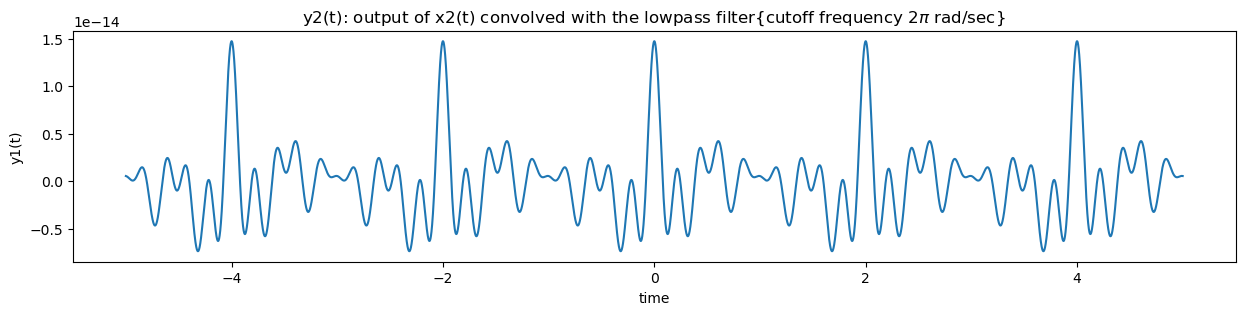

In [137]:
y2t = yt(x2t_func, lpfilter, tt2, 500*np.pi, N_ks, T_per2)
plt.figure(figsize=(15, 3))
plt.plot(tt2, y2t)
plt.title('y2(t): output of x2(t) convolved with the lowpass filter{cutoff frequency 2$\pi$ rad/sec}')
plt.xlabel('time')
plt.ylabel('y1(t)')
plt.show()